In [120]:
# antes de empezar importamos la librería de NumPy para poder trabajar con todos sus métodos. 
import numpy as np

# importamos la pandas para poder trabajar en la lección
import pandas as pd

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [121]:
df=pd.read_csv('df_transformado_limpio.csv', index_col=0)

In [122]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'distancefromhome',
       'education', 'educationfield', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'remotework'],
      dtype='object')

In [123]:
print(df.dtypes)

age                           int64
attrition                    object
businesstravel               object
dailyrate                   float64
distancefromhome              int64
education                     int64
educationfield               object
environmentsatisfaction       int64
gender                       object
hourlyrate                    int64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome               float64
monthlyrate                   int64
numcompaniesworked            int64
overtime                     object
percentsalaryhike             int64
performancerating           float64
relationshipsatisfaction      int64
stockoptionlevel              int64
totalworkingyears           float64
trainingtimeslastyear         int64
worklifebalance             float64
yearsatcompany                int64
yearssincelastpromotion     

## Visualizacion Númericas

In [124]:
columnas_num=['percentsalaryhike','trainingtimeslastyear','yearssincelastpromotion','monthlyrate', 'yearswithcurrmanager','jobsatisfaction']

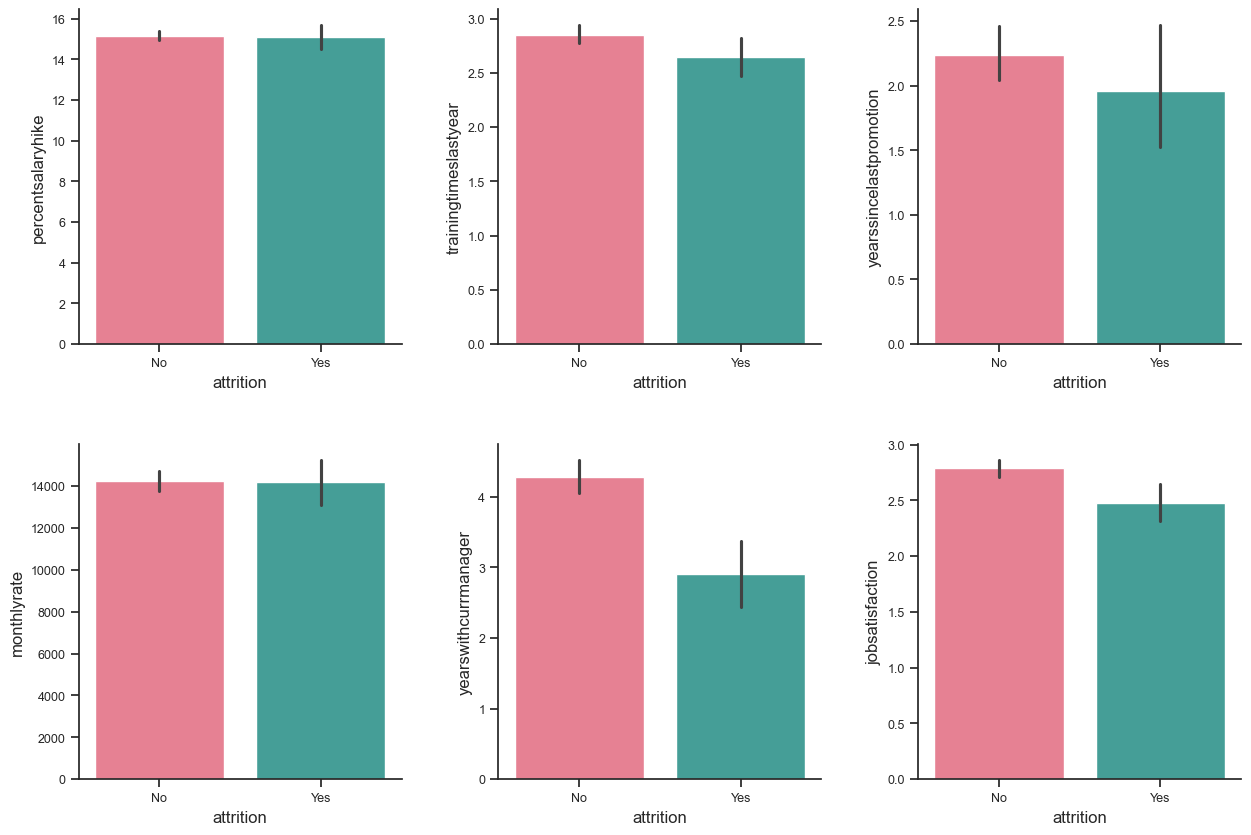

In [125]:
#Boxplot de percentsalaryhike','trainingtimeslastyear','yearssincelastpromotion','monthlyrate', 'yearswithcurrmanager','jobsatisfaction']

fig, axes = plt.subplots(nrows=2, ncols=len(columnas_num)//2, figsize=(15, 10), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
# gridspec_kw={'wspace': 0.5}) -> espacio en ancho (width)

axes = axes.flat

for ind, col in enumerate(columnas_num):
    sns.barplot(x = "attrition", y = col, hue= "attrition", data = df, ax = axes[ind],palette = "husl")
    #Título Y
    axes[ind].set_ylabel(col)

    # Ejes s:
    axes[ind].tick_params(axis='x', labelsize=9)
    axes[ind].tick_params(axis='y', labelsize=9)
    
    #Tama etiquetas del eje:
    axes[ind].set_xlabel('attrition', fontsize=12)
    axes[ind].set_ylabel(col, fontsize=12)     

    #Eliminamos los margenes superior y derecho
    axes[ind].spines['right'].set_visible(False)
    axes[ind].spines['top'].set_visible(False)


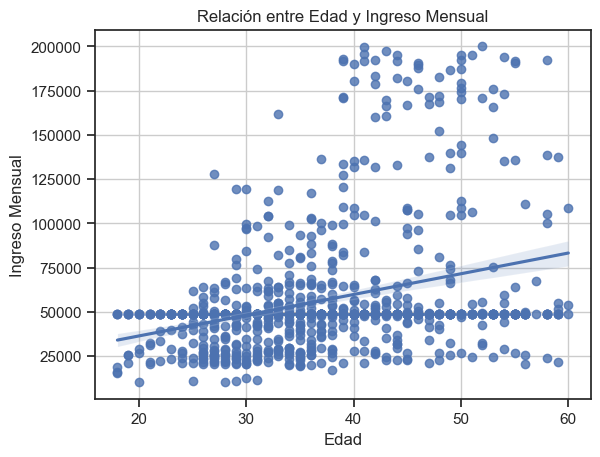

In [126]:
# Regplot de las variables numericas de age y monthly
sns.regplot(x='age', y='monthlyincome', data=df)
plt.title('Relación entre Edad y Ingreso Mensual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Mensual')
plt.grid(True)
plt.show()

# Histograma de las edades de los empleados

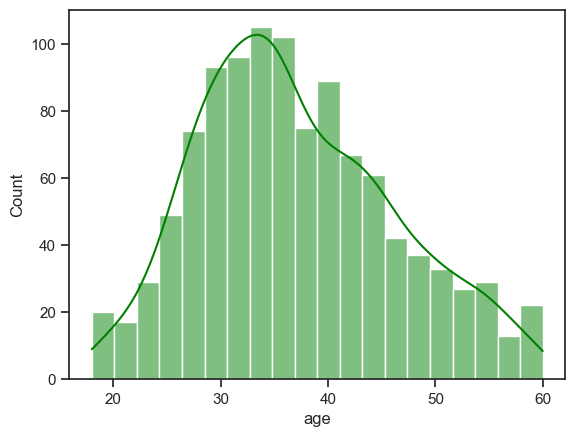

In [127]:

sns.histplot(x = "age", 
             data = df, 
             color = "green", 
             kde = True, 
             bins = 20 );

# Scatterplot de las variables numericas

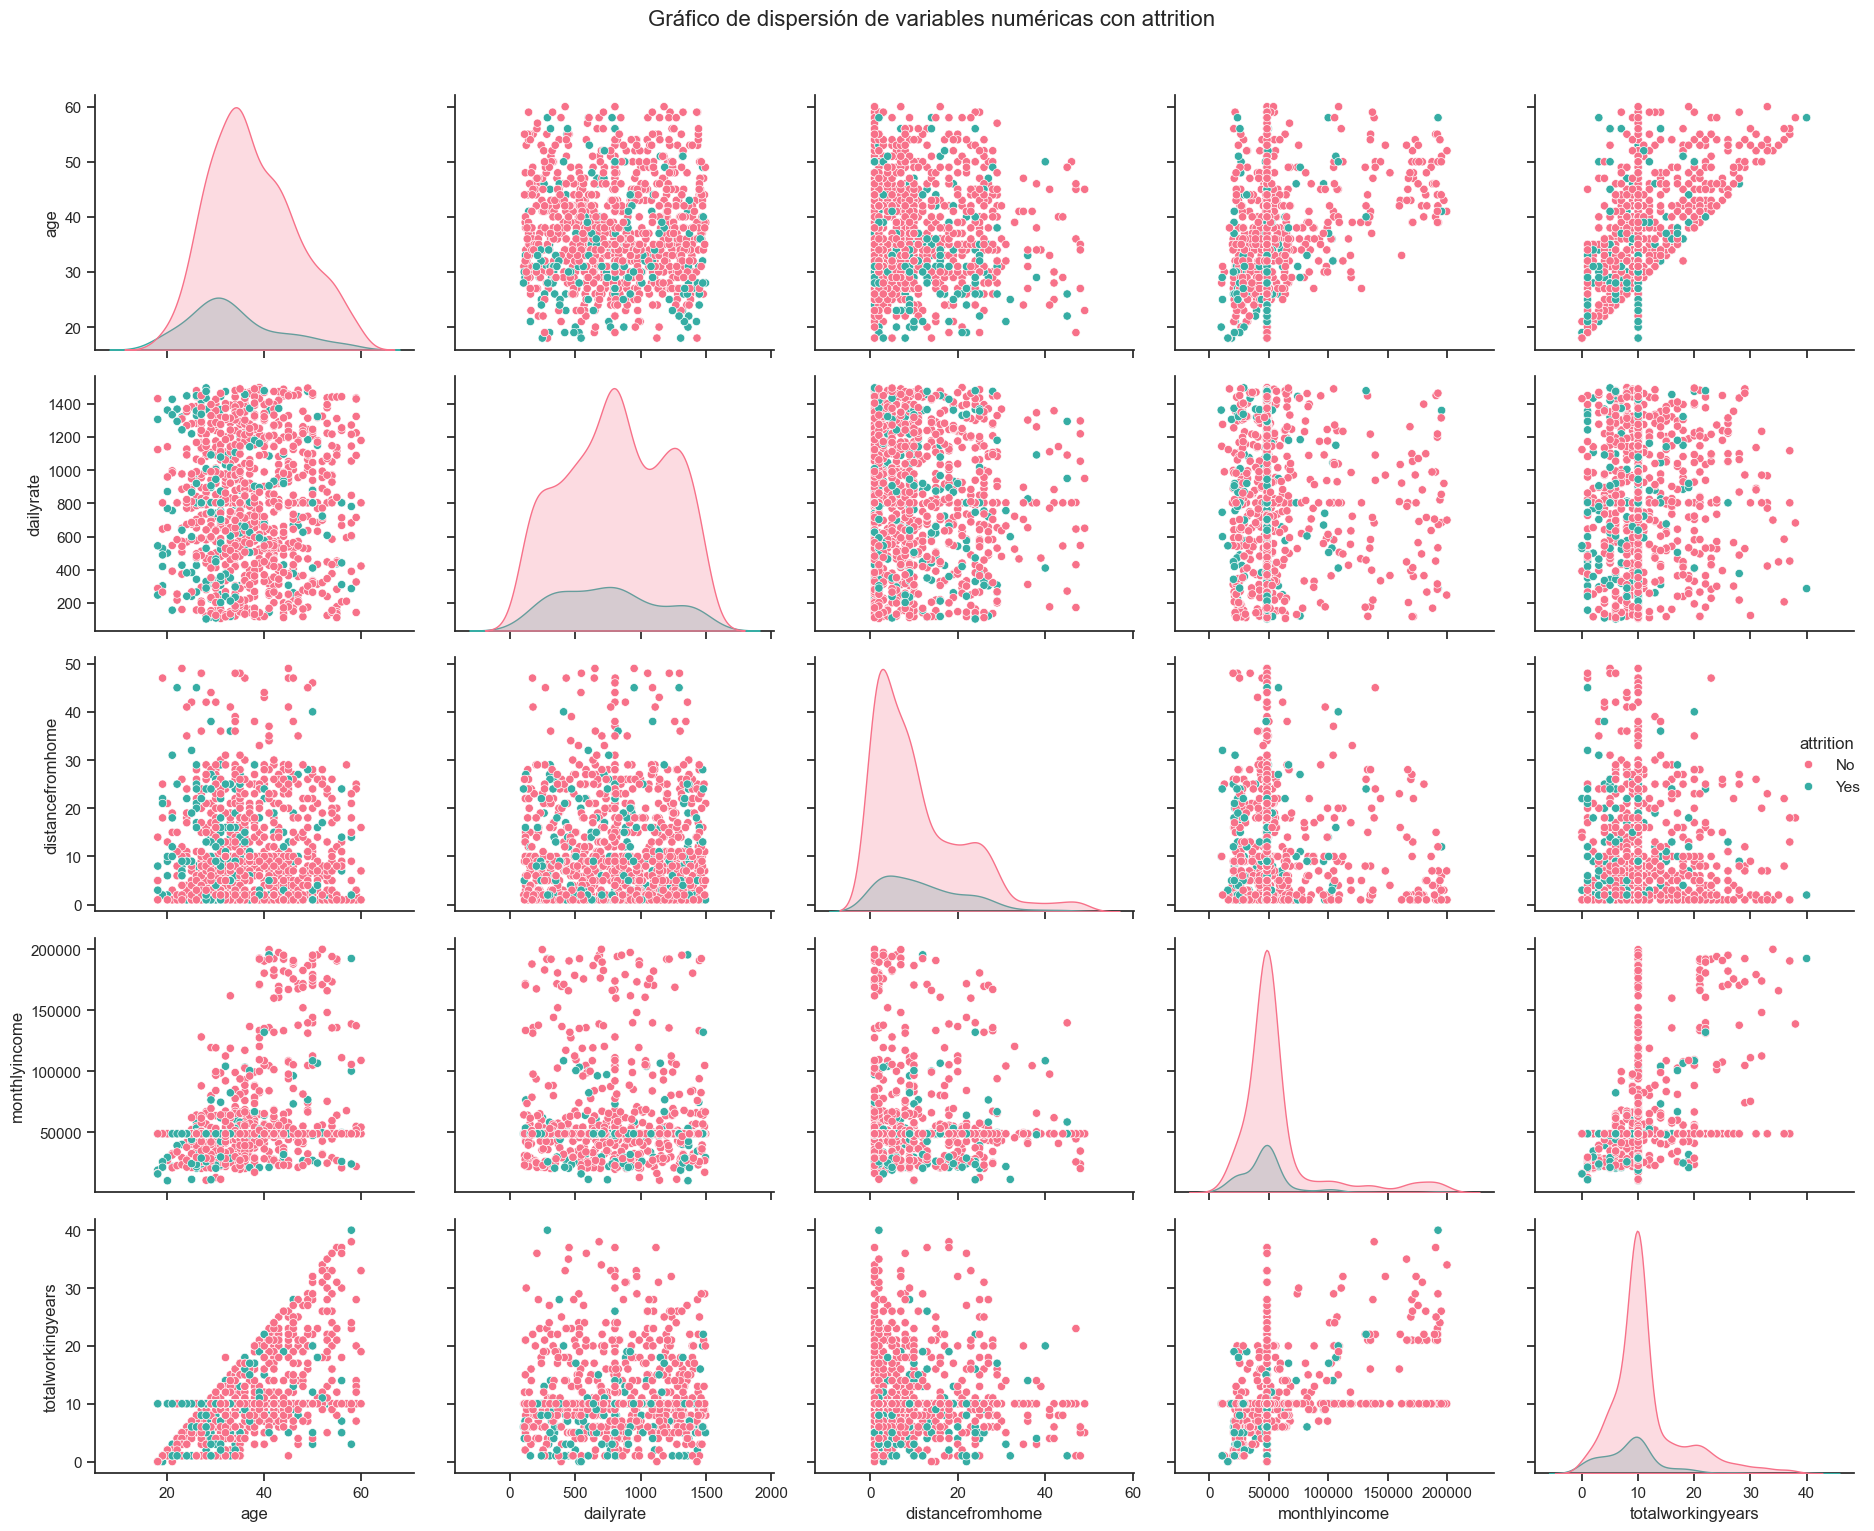

In [128]:
# Ejemplo de selección de variables numéricas
numeric_vars = ['age', 'dailyrate', 'distancefromhome', 'monthlyincome', 'totalworkingyears']

# Crear el gráfico de dispersión usando Seaborn con 'attrition' como hue
sns.set(style="ticks")
sns.pairplot(df[numeric_vars + ['attrition']], hue='attrition', kind="scatter", palette='husl', height=3, aspect=1.2)
plt.suptitle('Gráfico de dispersión de variables numéricas con attrition', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Regplot de las variables numericas

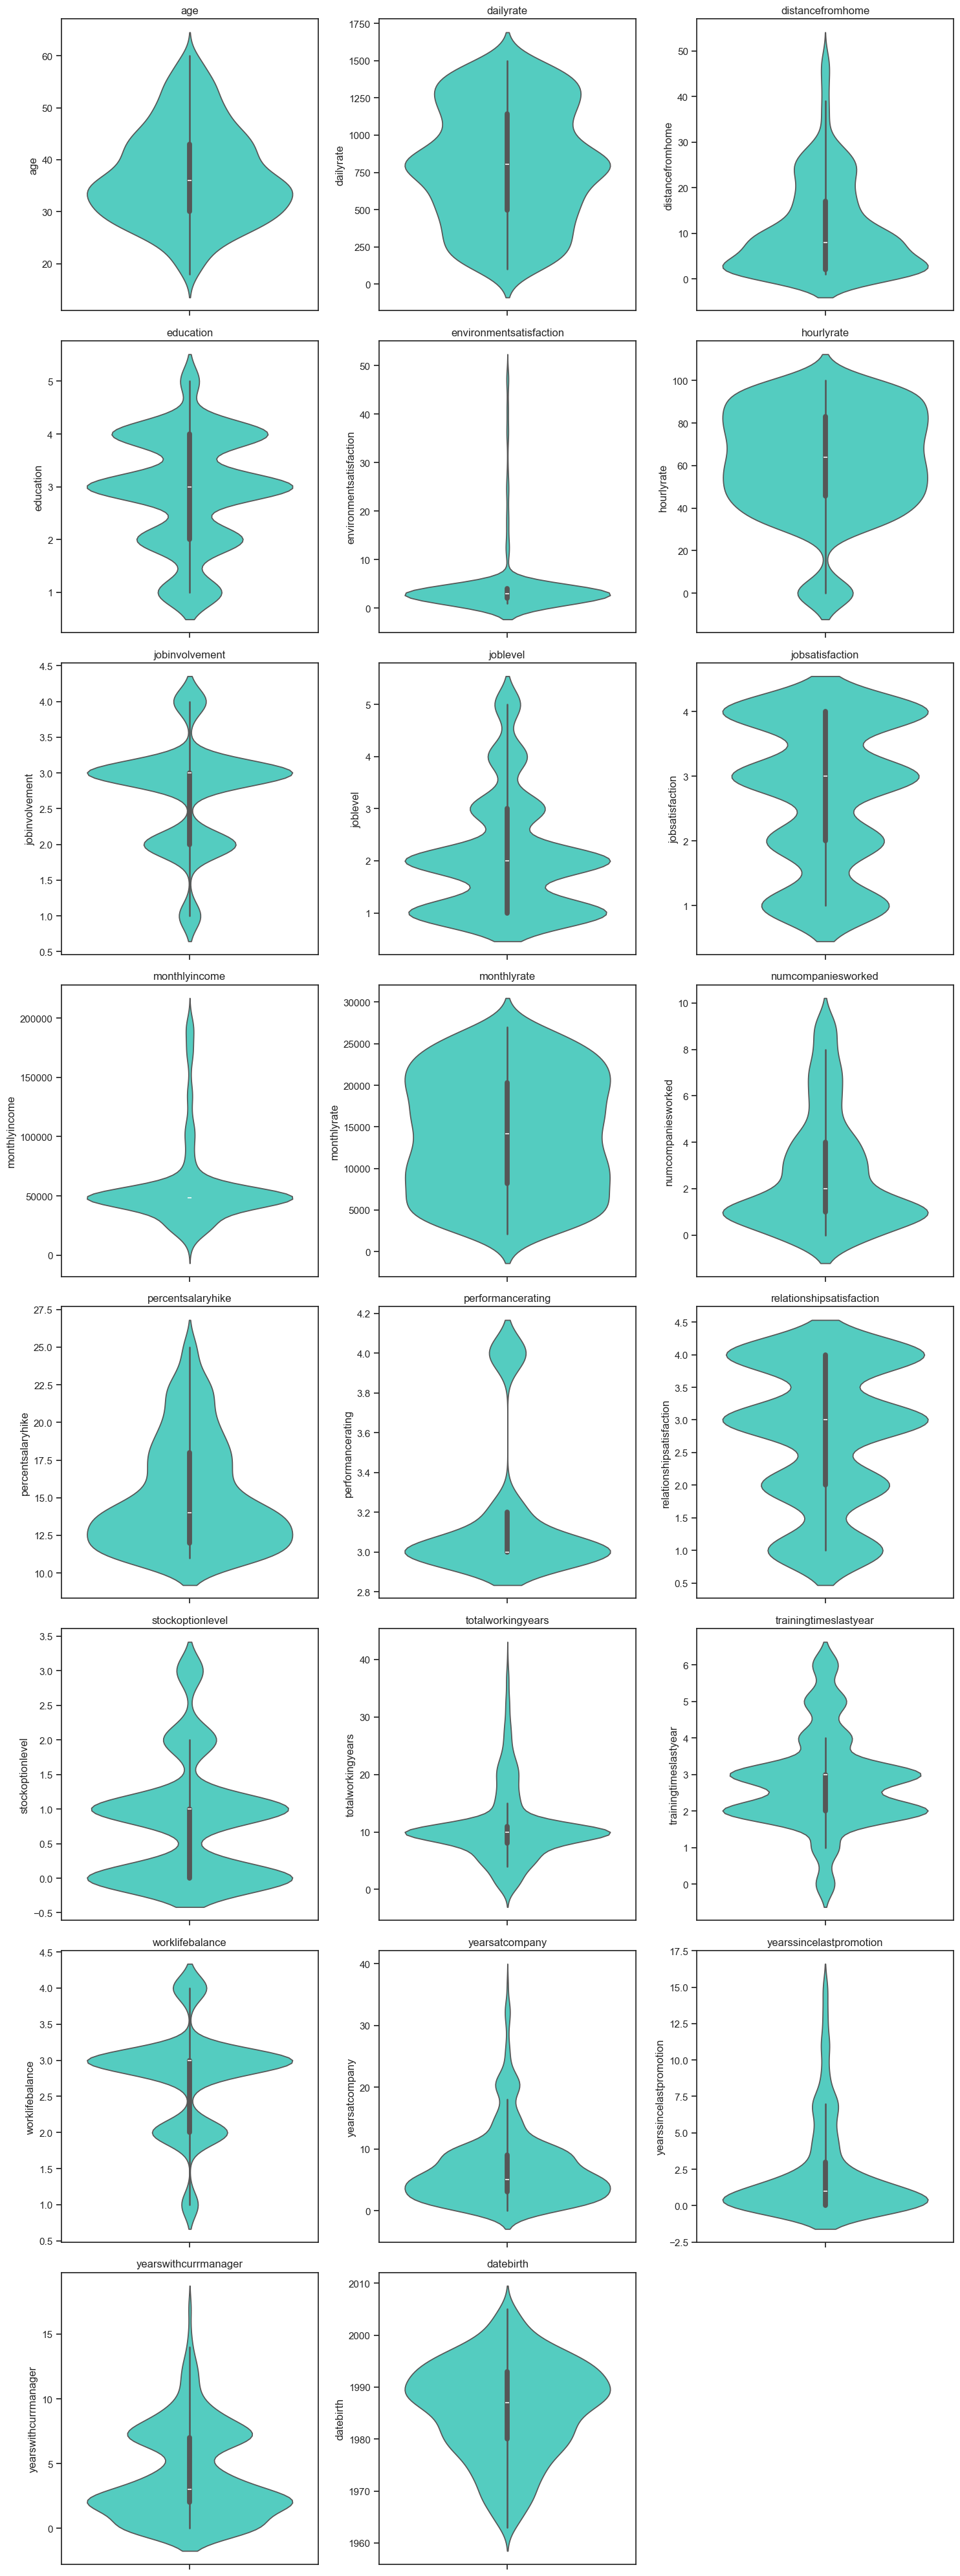

In [129]:

# Suponiendo que tienes un DataFrame llamado 'df' con las variables numéricas que deseas visualizar

# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular el número de subplots necesarios
num_plots = len(numeric_columns.columns)

# Calcular el número de filas y columnas necesarias para acomodar todos los subplots
num_cols = 3  # Número de columnas
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)  # Número de filas

# Ajustar el alto de la figura para hacer más altos los gráficos
plt.figure(figsize=(15, num_rows * 5))  # Ancho de 15 pulgadas, alto dinámico según el número de filas

# Loop para crear violinplots de cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Subplot dinámico según num_rows y num_cols
    sns.violinplot(y=df[col], color='turquoise')
    plt.title(col)  # Título de la variable

plt.tight_layout()
plt.show()



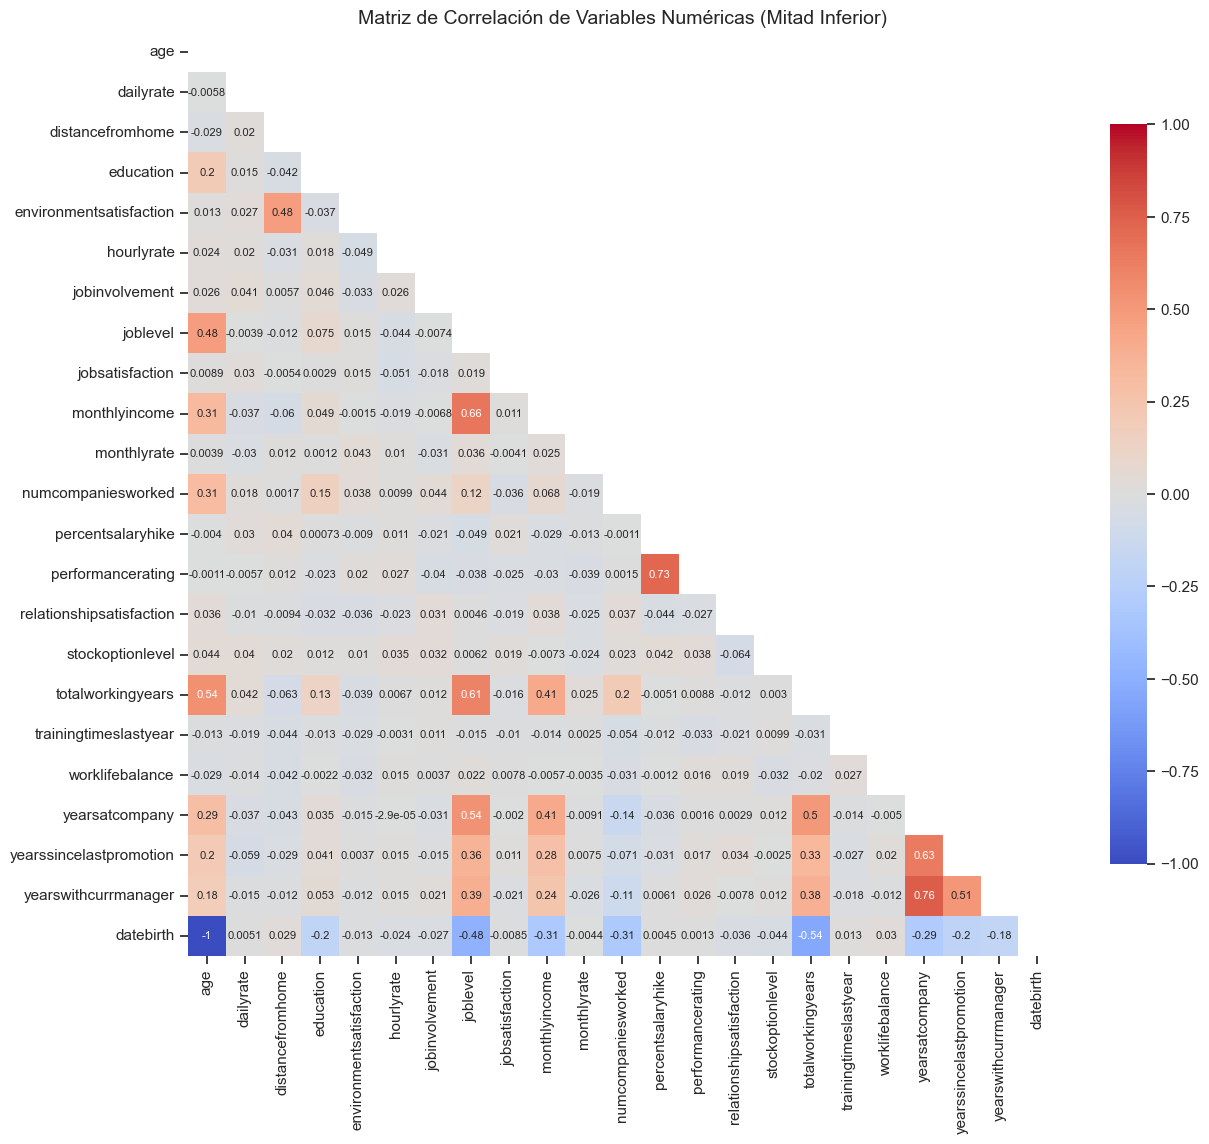

In [130]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que tienes un DataFrame llamado 'df' con las variables numéricas que deseas visualizar

# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular el número de subplots necesarios
num_plots = len(numeric_columns.columns)

# Calcular la matriz de correlación
corr_matrix = numeric_columns.corr()

# Crear una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Ajustar el tamaño de la figura para hacer espacio suficiente
plt.figure(figsize=(14, 12))

# Crear el mapa de calor de la matriz de correlación utilizando seaborn
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación de Variables Numéricas (Mitad Inferior)', fontsize=14)
plt.show()


## Visualizacion categóricas

In [131]:
columnas_cat=['businesstravel','educationfield','jobrole','maritalstatus', 'overtime','remotework']

In [132]:
colores = sns.color_palette('husl', n_colors=7) 

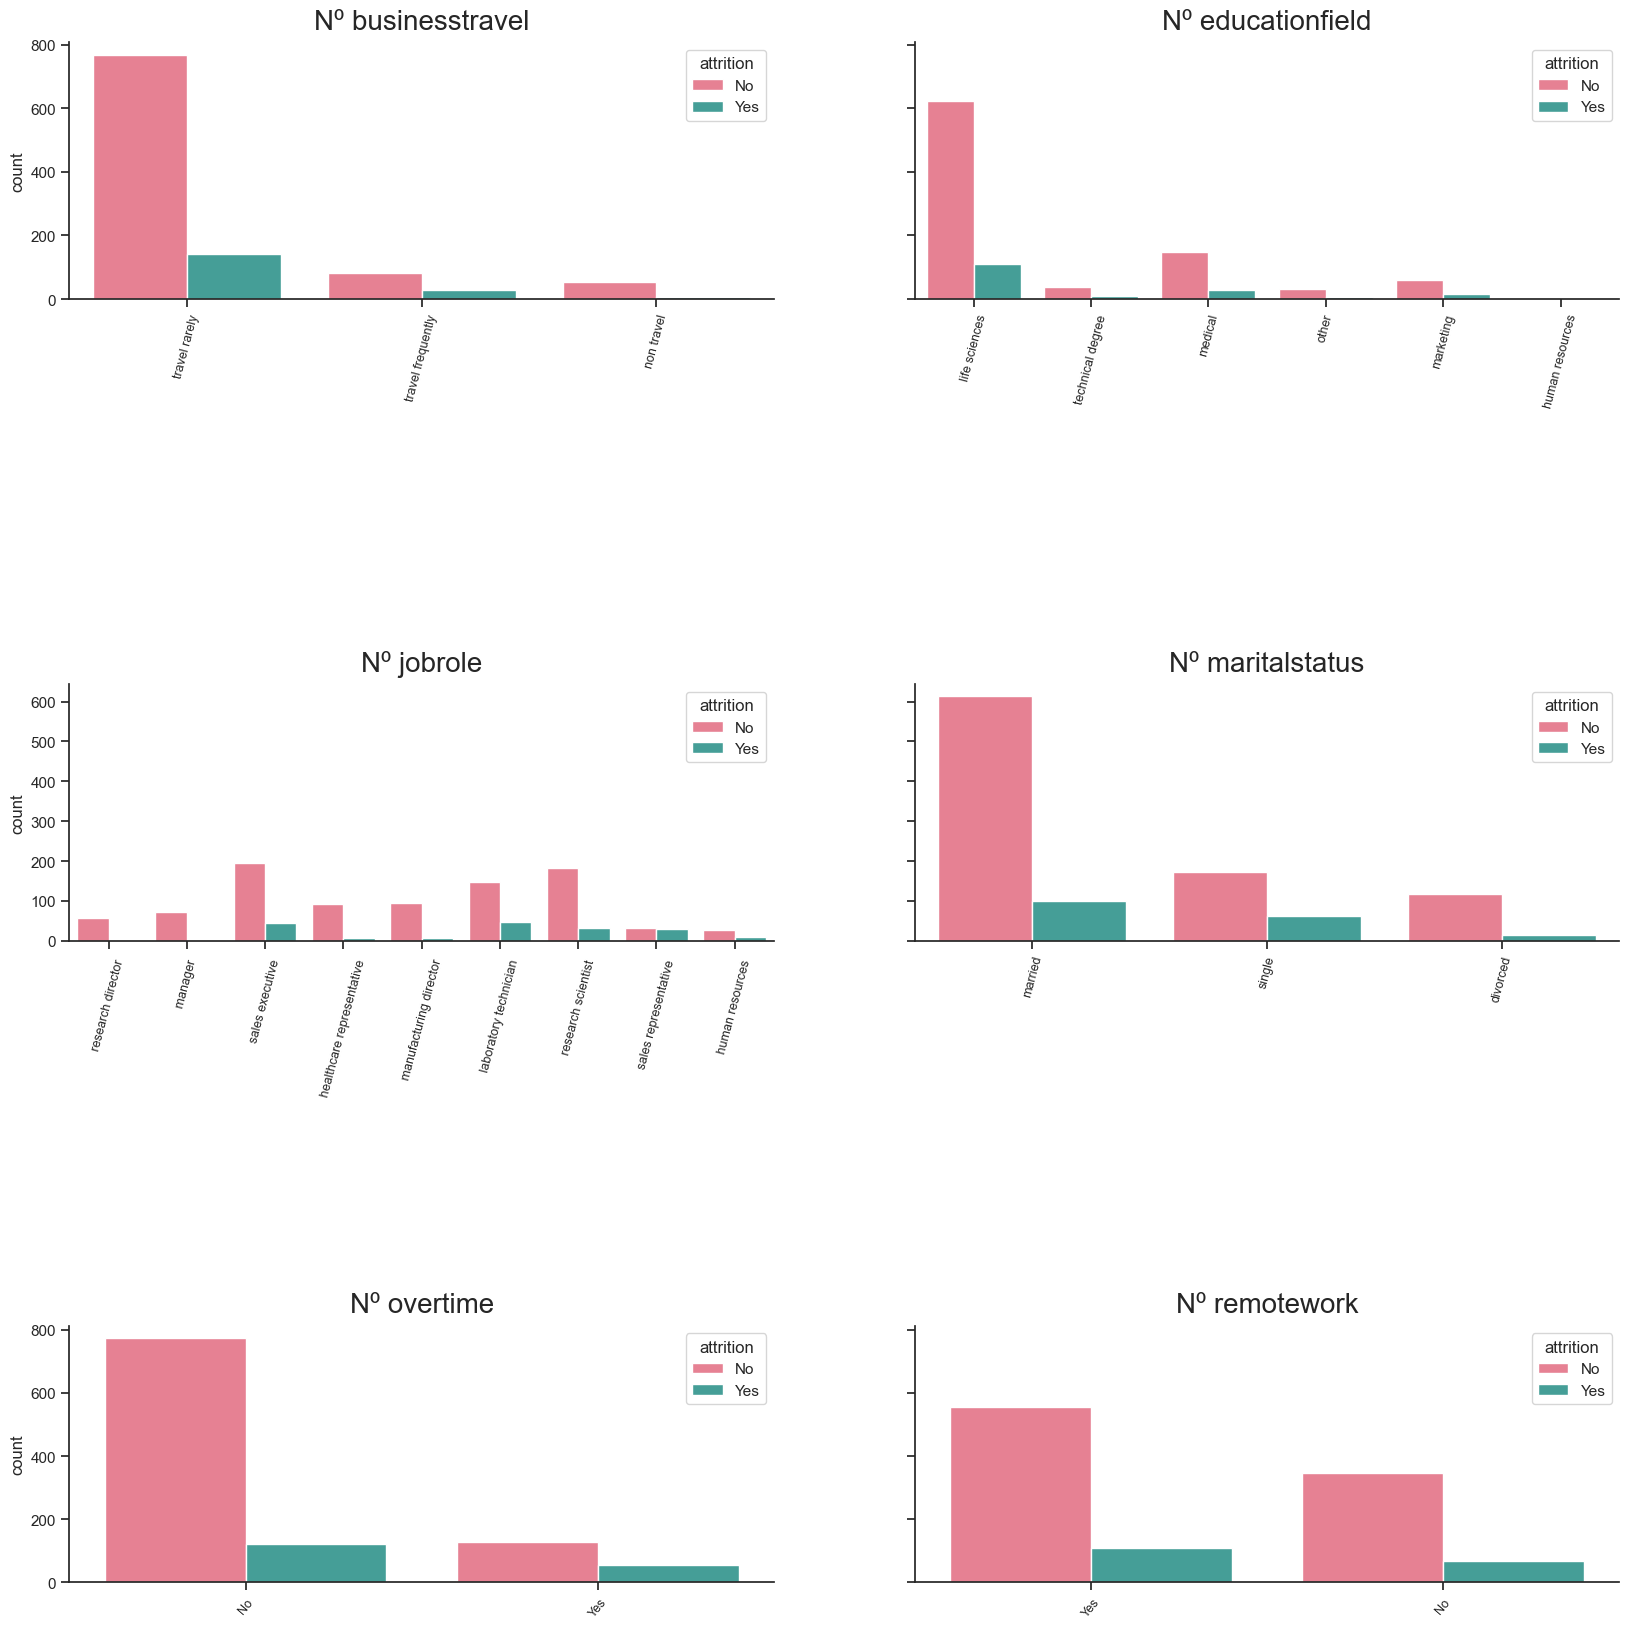

In [133]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20), sharey='row', gridspec_kw={'hspace': 1.5})
#gridspec_kw={'hspace': 0.5}) -> espacio en alto (high)

axes = axes.flat
for ind, col in enumerate(columnas_cat):
    ax = axes[ind]
    sns.countplot(x=col, data=df, palette='husl', hue ='attrition',  ax=ax)
    
    # las 4 primeras gráficas tienen las etiquetas en horizontal:
    if ind < 4:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='center', fontsize=9)
    

    else:
        ax.set_xticks(ax.get_xticks())
        axes[ind].set_xticklabels(axes[ind].get_xticklabels(), rotation=50, ha='center', fontsize=9)
     
    ax.set_title(f'Nº {col}', y=1.02, fontsize=20)
    ax.set_xlabel('')

    #Eliminamos los margenes superior y derecho
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.show()